In [2]:
import cv2
import glob
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [ ]:
!wget https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip
!unzip HW5.zip

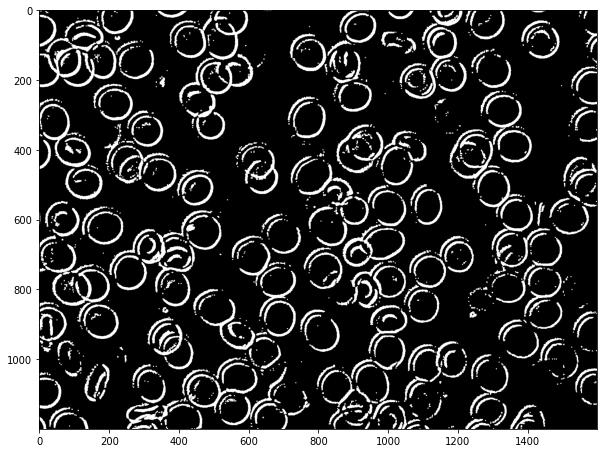

In [262]:
image = cv2.imread('./HW5/blood_cell.jpg', cv2.IMREAD_GRAYSCALE)

bin_img = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 5)
bin_img[bin_img == 255] = 10
bin_img[bin_img == 0] = 255
bin_img[bin_img == 10] = 0

# for _ in range(1):
#     kernel = np.ones((5, 5))
#     bin_img = cv2.erode(bin_img, kernel)

for _ in range(1):
    kernel = np.ones((3, 3))
    bin_img = cv2.dilate(bin_img, kernel)

fig = plt.figure(figsize=(10, 10))
plt.imshow(bin_img, cmap='gray')

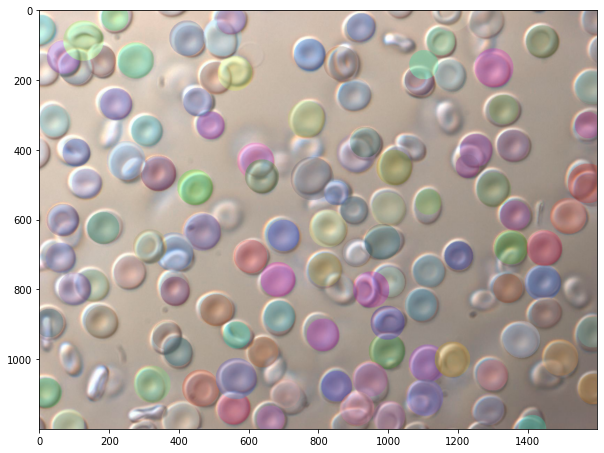

In [263]:
image = cv2.imread('./HW5/blood_cell.jpg', cv2.IMREAD_COLOR)

circs = cv2.HoughCircles(bin_img, cv2.HOUGH_GRADIENT, 1, 40, param1=100, param2=18, minRadius=30, maxRadius=70)

back = image.copy()
for c in circs[0]:

    r = np.random.randint(0, 256)
    g = np.random.randint(0, 256)
    b = np.random.randint(0, 256)

    cv2.circle(back, (c[0], c[1]), c[2], color=(r, g, b), thickness=cv2.FILLED)

alpha = 0.25
image = cv2.addWeighted(image, 1-alpha, back, alpha, 0)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image)